In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [14]:
df=pd.read_csv("UCI_Credit_Card.csv")

In [15]:
print(df.head())
print(df.info()) #No missing value

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

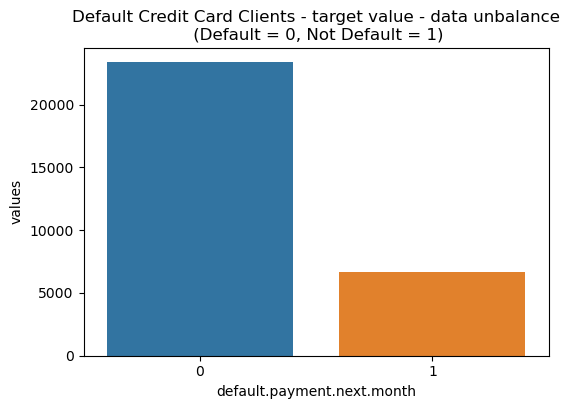

In [20]:
temp = df["default.payment.next.month"].value_counts()
df_1= pd.DataFrame({'default.payment.next.month': temp.index,'values': temp.values})
plt.figure(figsize = (6,4))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df_1)
locs, labels = plt.xticks()
plt.show()

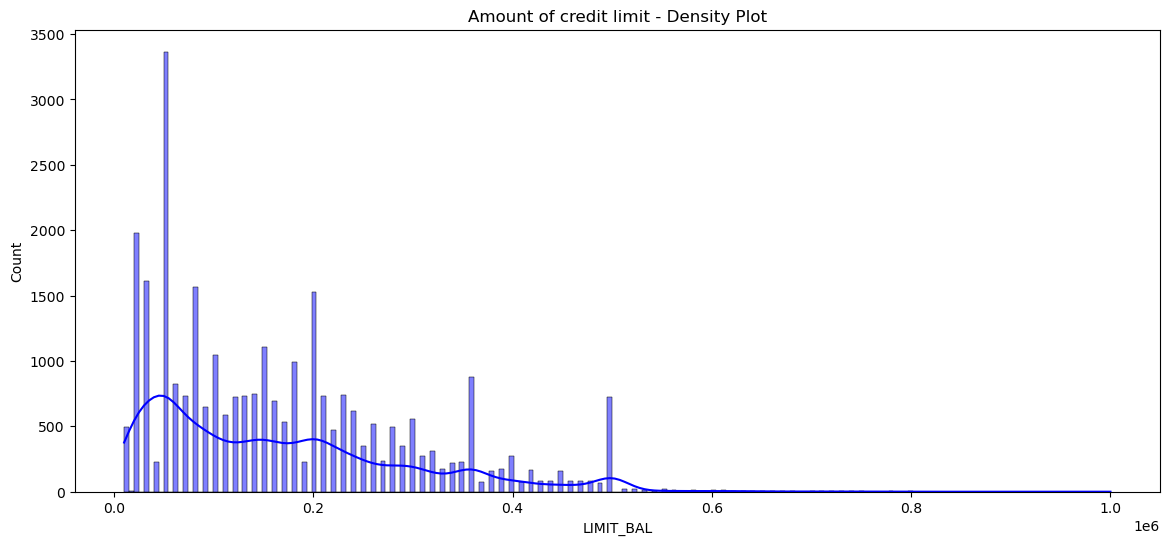

In [23]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.histplot(df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

In [38]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

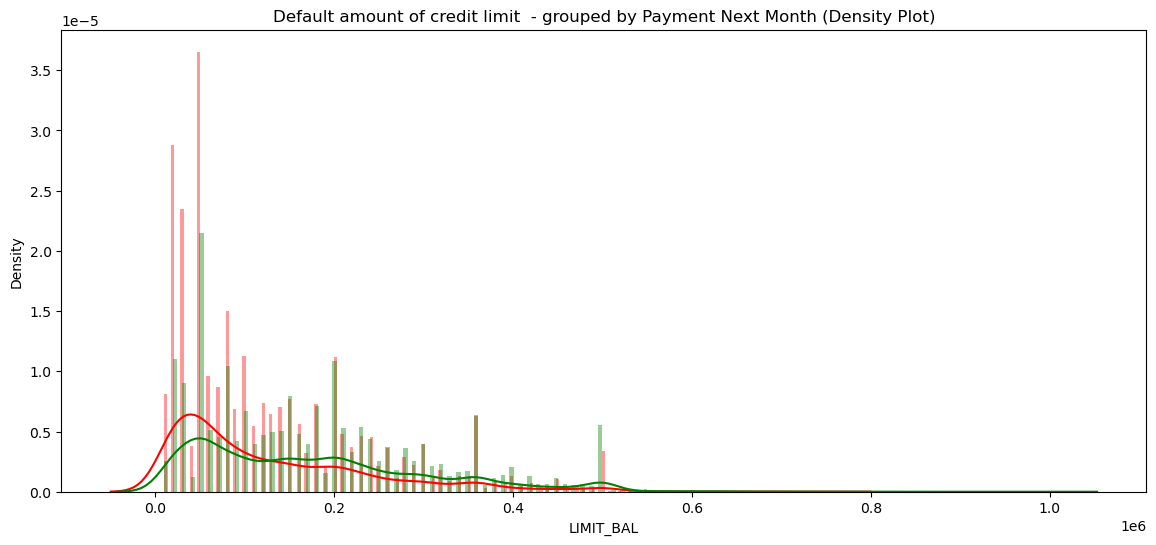

In [66]:
class_0 = df.loc[df['default.payment.next.month'] == 0]["LIMIT_BAL"]
class_1 = df.loc[df['default.payment.next.month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

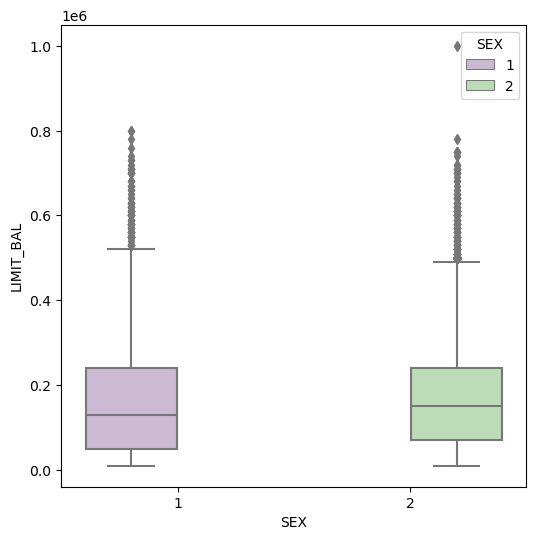

In [43]:
plt.figure(figsize=(6,6))
s = sns.boxplot(x="SEX", y="LIMIT_BAL", hue="SEX",data=df, palette="PRGn",showfliers=True)
plt.show();

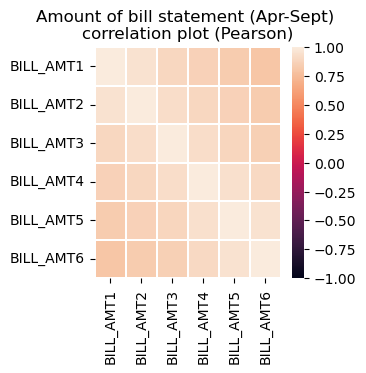

In [46]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (3,3))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

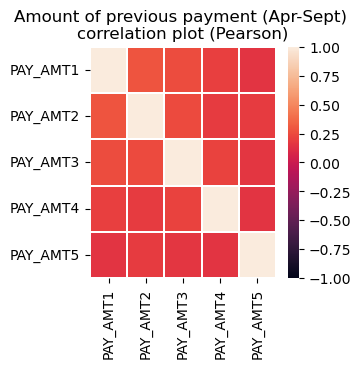

In [48]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (3,3))
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

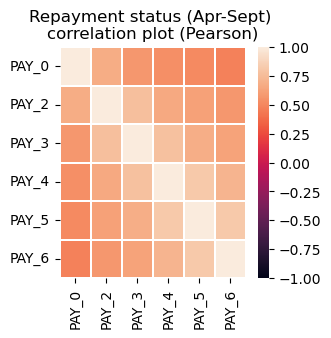

In [50]:
var = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (3,3))
plt.title('Repayment status (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

In [53]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=df, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();


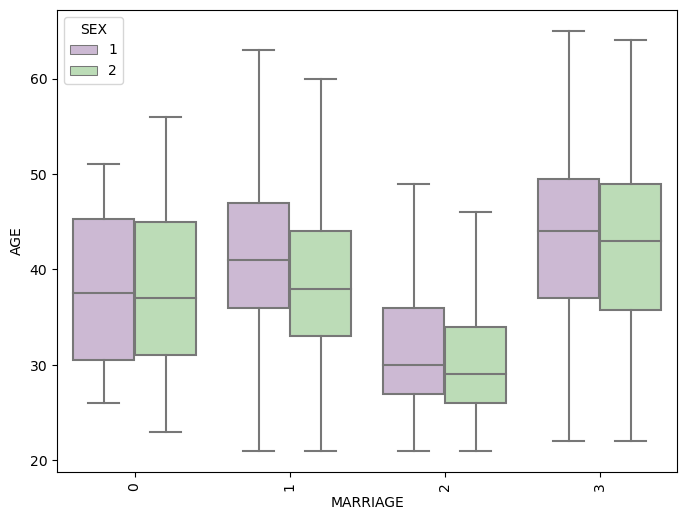

In [56]:
boxplot_variation('MARRIAGE','AGE','SEX',8)

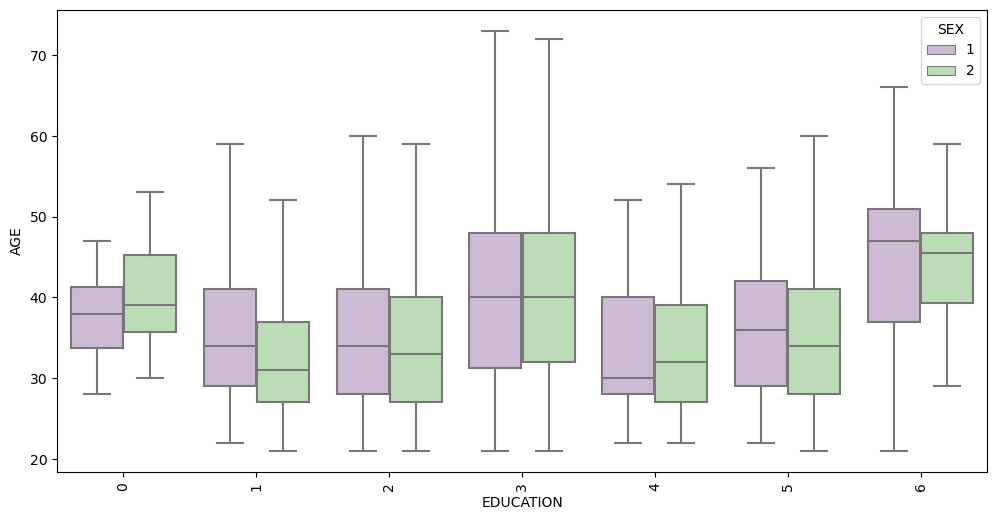

In [58]:
boxplot_variation('EDUCATION','AGE','SEX',12)

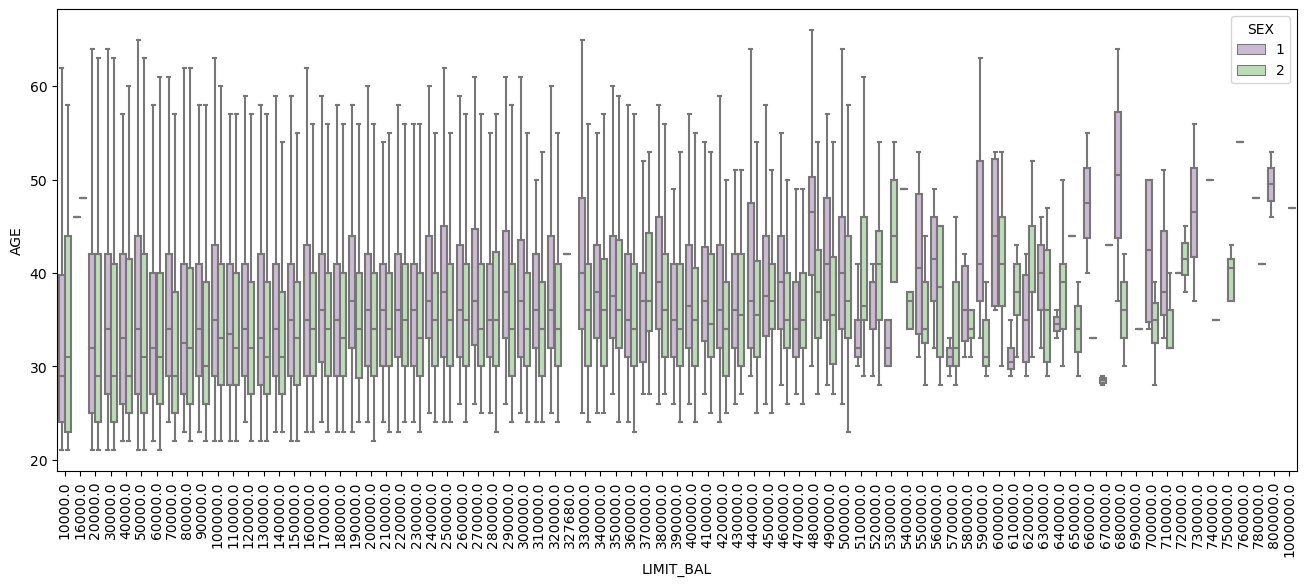

In [63]:
boxplot_variation('LIMIT_BAL','AGE','SEX',16)

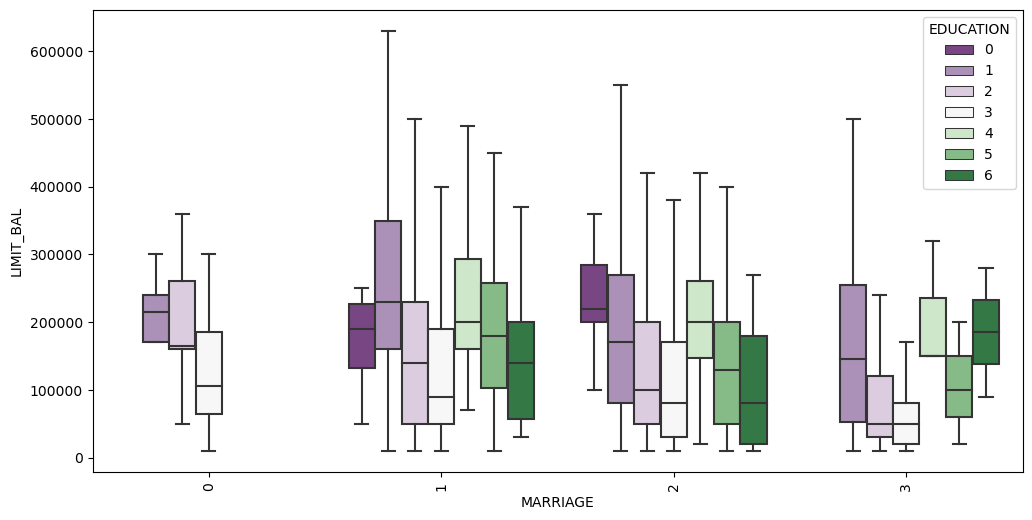

In [64]:
boxplot_variation('MARRIAGE','LIMIT_BAL', 'EDUCATION',12)

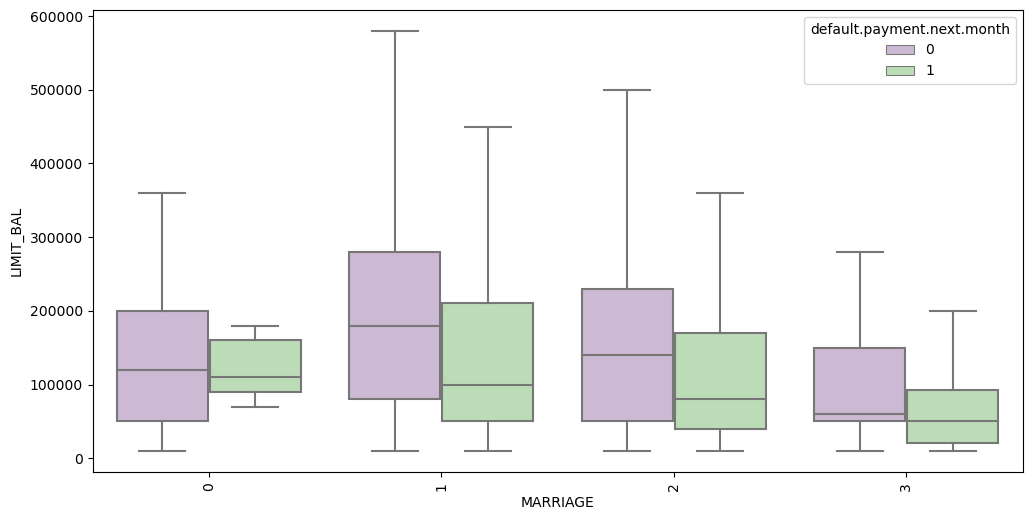

In [69]:
boxplot_variation('MARRIAGE','LIMIT_BAL', 'default.payment.next.month',12)

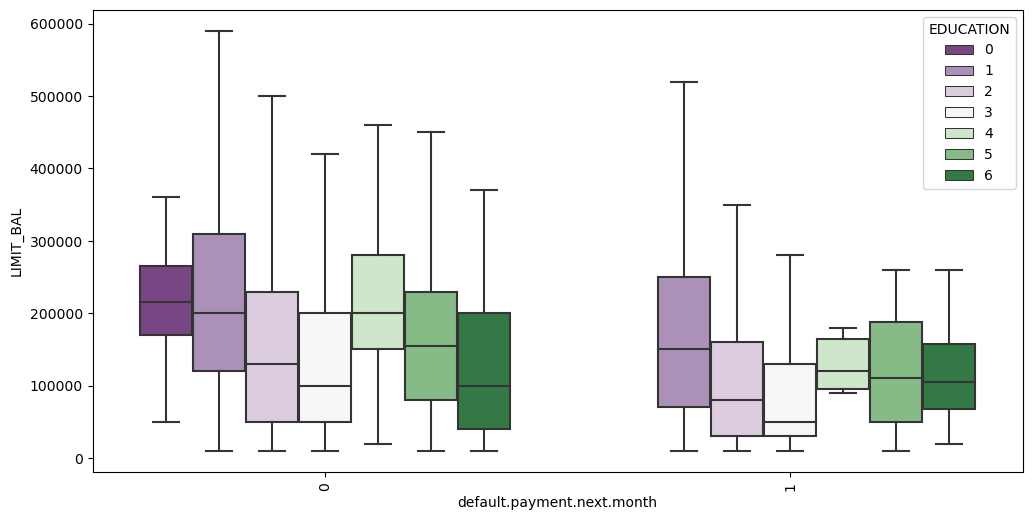

In [70]:
boxplot_variation('default.payment.next.month','LIMIT_BAL','EDUCATION',12)

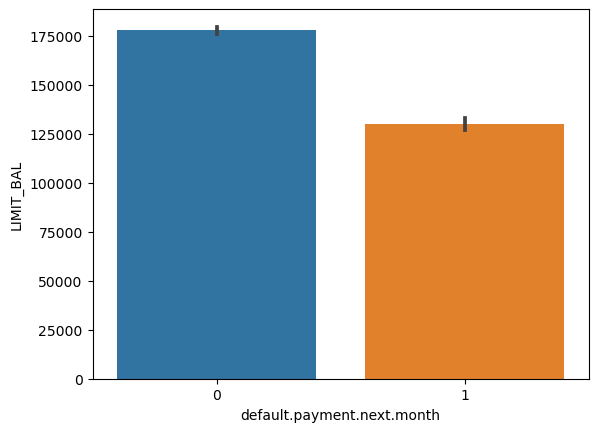

In [68]:
sns.barplot(x='default.payment.next.month', y='LIMIT_BAL', data=df)
plt.show()